# Description of the problem

The main aim of this research is to predict the possible `Churn` of the mobile operator customers

# First part. Research

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [32]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 8.10MB/s]


In [33]:
data = pd.read_csv('./train.csv')

In [53]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2407,9,75.85,724.65,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
3658,2,19.95,38.15,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
415,2,94.95,178.10,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,1
5088,64,108.95,7111.30,Female,1,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
3726,71,82.70,5831.20,Female,1,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),0


In [34]:
# Numerical cols
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorical cols
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [36]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


*As we can see, there are no NaN values in the dataset, but you should still be careful, since the missing data may be set differently, and therefore we will conduct an additional check.*

In [37]:
for i in num_cols:
  print(data[i].value_counts())

ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: count, Length: 73, dtype: int64
MonthlySpending
20.05    46
19.65    35
19.95    34
20.00    33
19.70    32
         ..
87.30     1
68.90     1
67.20     1
86.30     1
98.20     1
Name: count, Length: 1468, dtype: int64
TotalSpent
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: count, Length: 4978, dtype: int64


*Yeah, so there are empty values in Total Spent, even if they are not NaN. Let's replace them with 0.*

In [38]:
data[data['TotalSpent'] == ' '] = data[data['TotalSpent'] == ' '].replace(' ', 0)
data['TotalSpent'] = data['TotalSpent'].astype(float)
data['TotalSpent'].value_counts()

,count
TotalSpent,
0.00,9
20.20,9
19.75,8
20.05,6
19.65,6
...,...
41.85,1
4326.25,1
950.20,1


## Data Analysis

*For numerical features, let's construct a histogram (*plt.hist(...)*) or boxplot (*plt.boxplot(...)*). For categorical ones, count the number of each value for each feature.*

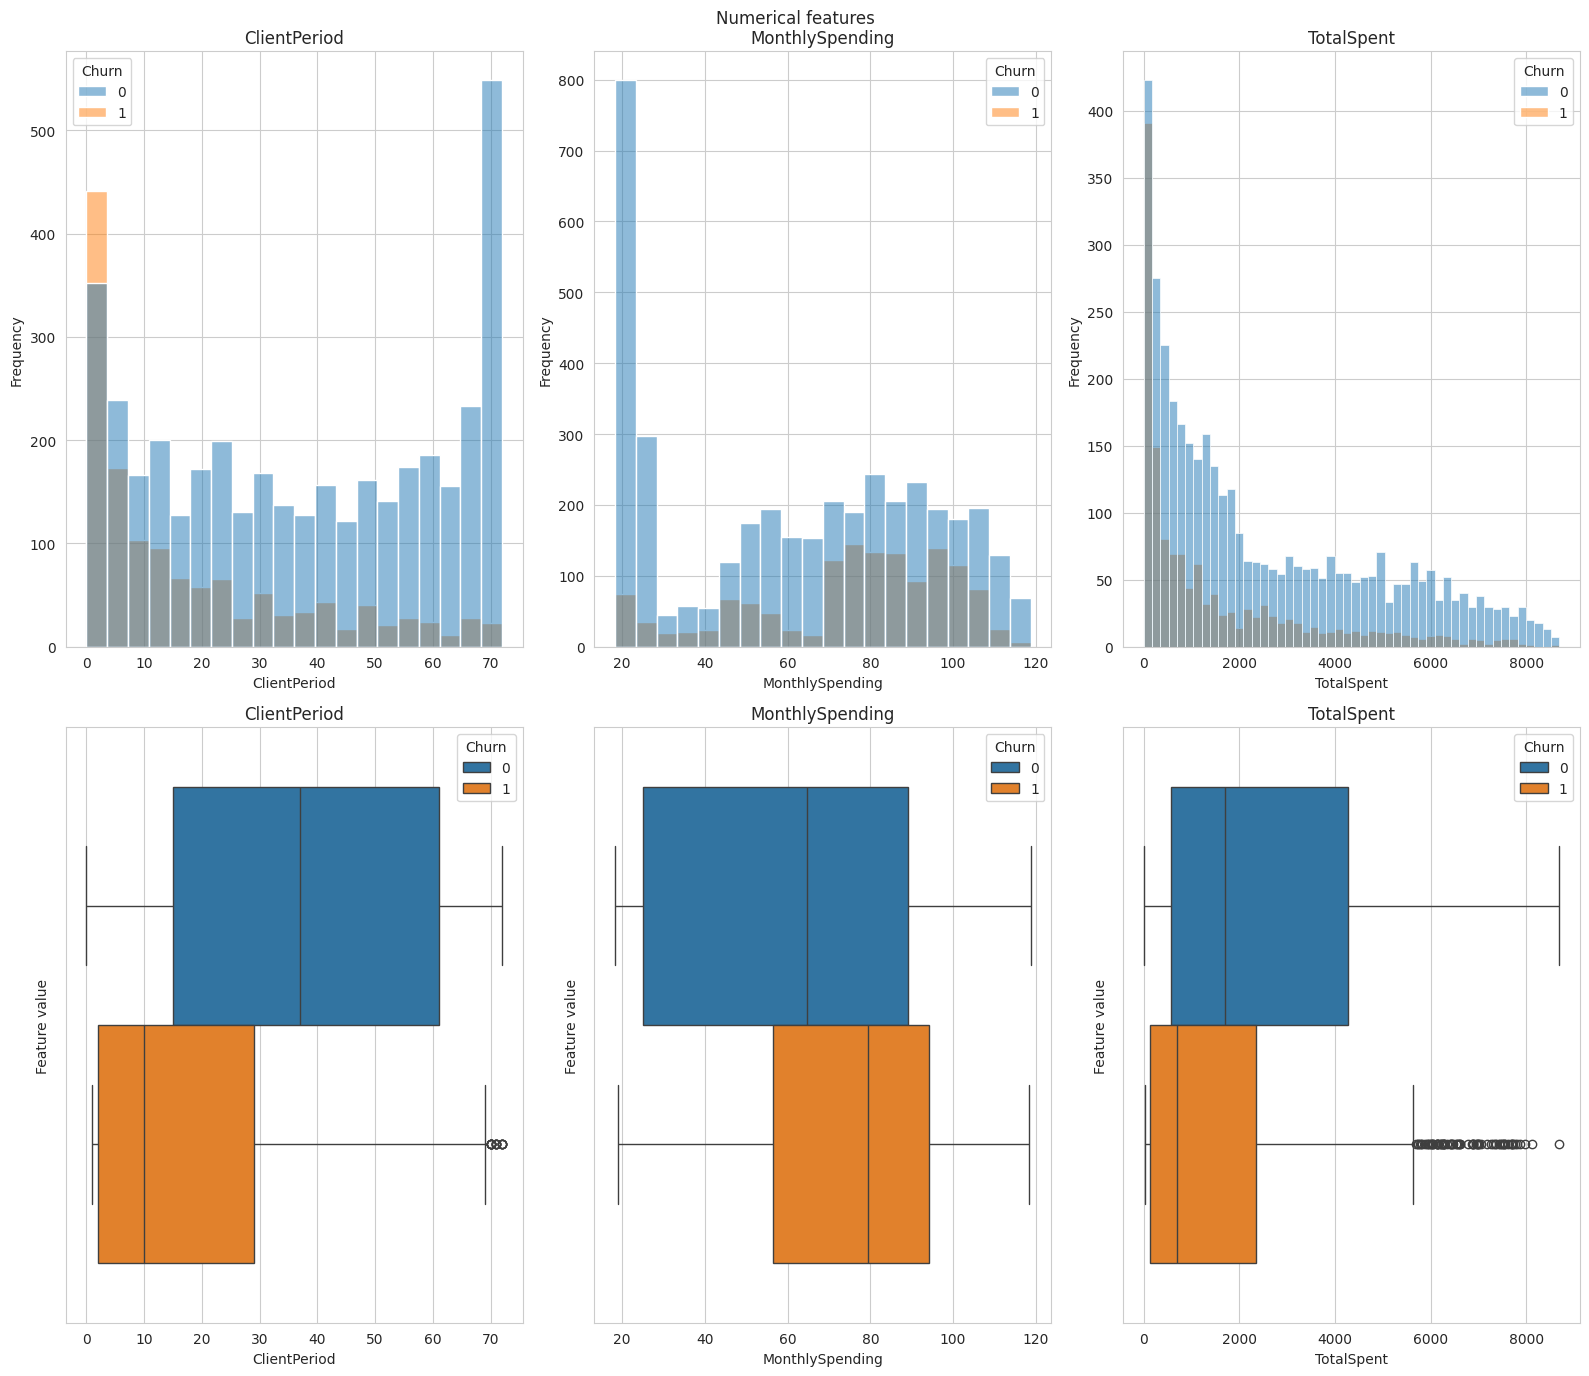

In [39]:
colors = ['red', 'green', 'blue']
bins = [20, 20, 50]
sns.set_style('whitegrid')
plt.figure(figsize=(16,14))
plt.suptitle('Numerical features')
for i in range(3):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=data, x=num_cols[i], bins=bins[i], color=colors[i], hue=target_col)
    plt.xlabel(num_cols[i])
    plt.ylabel('Frequency')
    plt.title(num_cols[i])
for i in range(3):
    plt.subplot(2, 3, i+4)
    sns.boxplot(data=data, x=num_cols[i], hue=target_col)
    plt.xlabel(num_cols[i])
    plt.ylabel('Feature value')
    plt.title(num_cols[i])
plt.tight_layout()
plt.show()

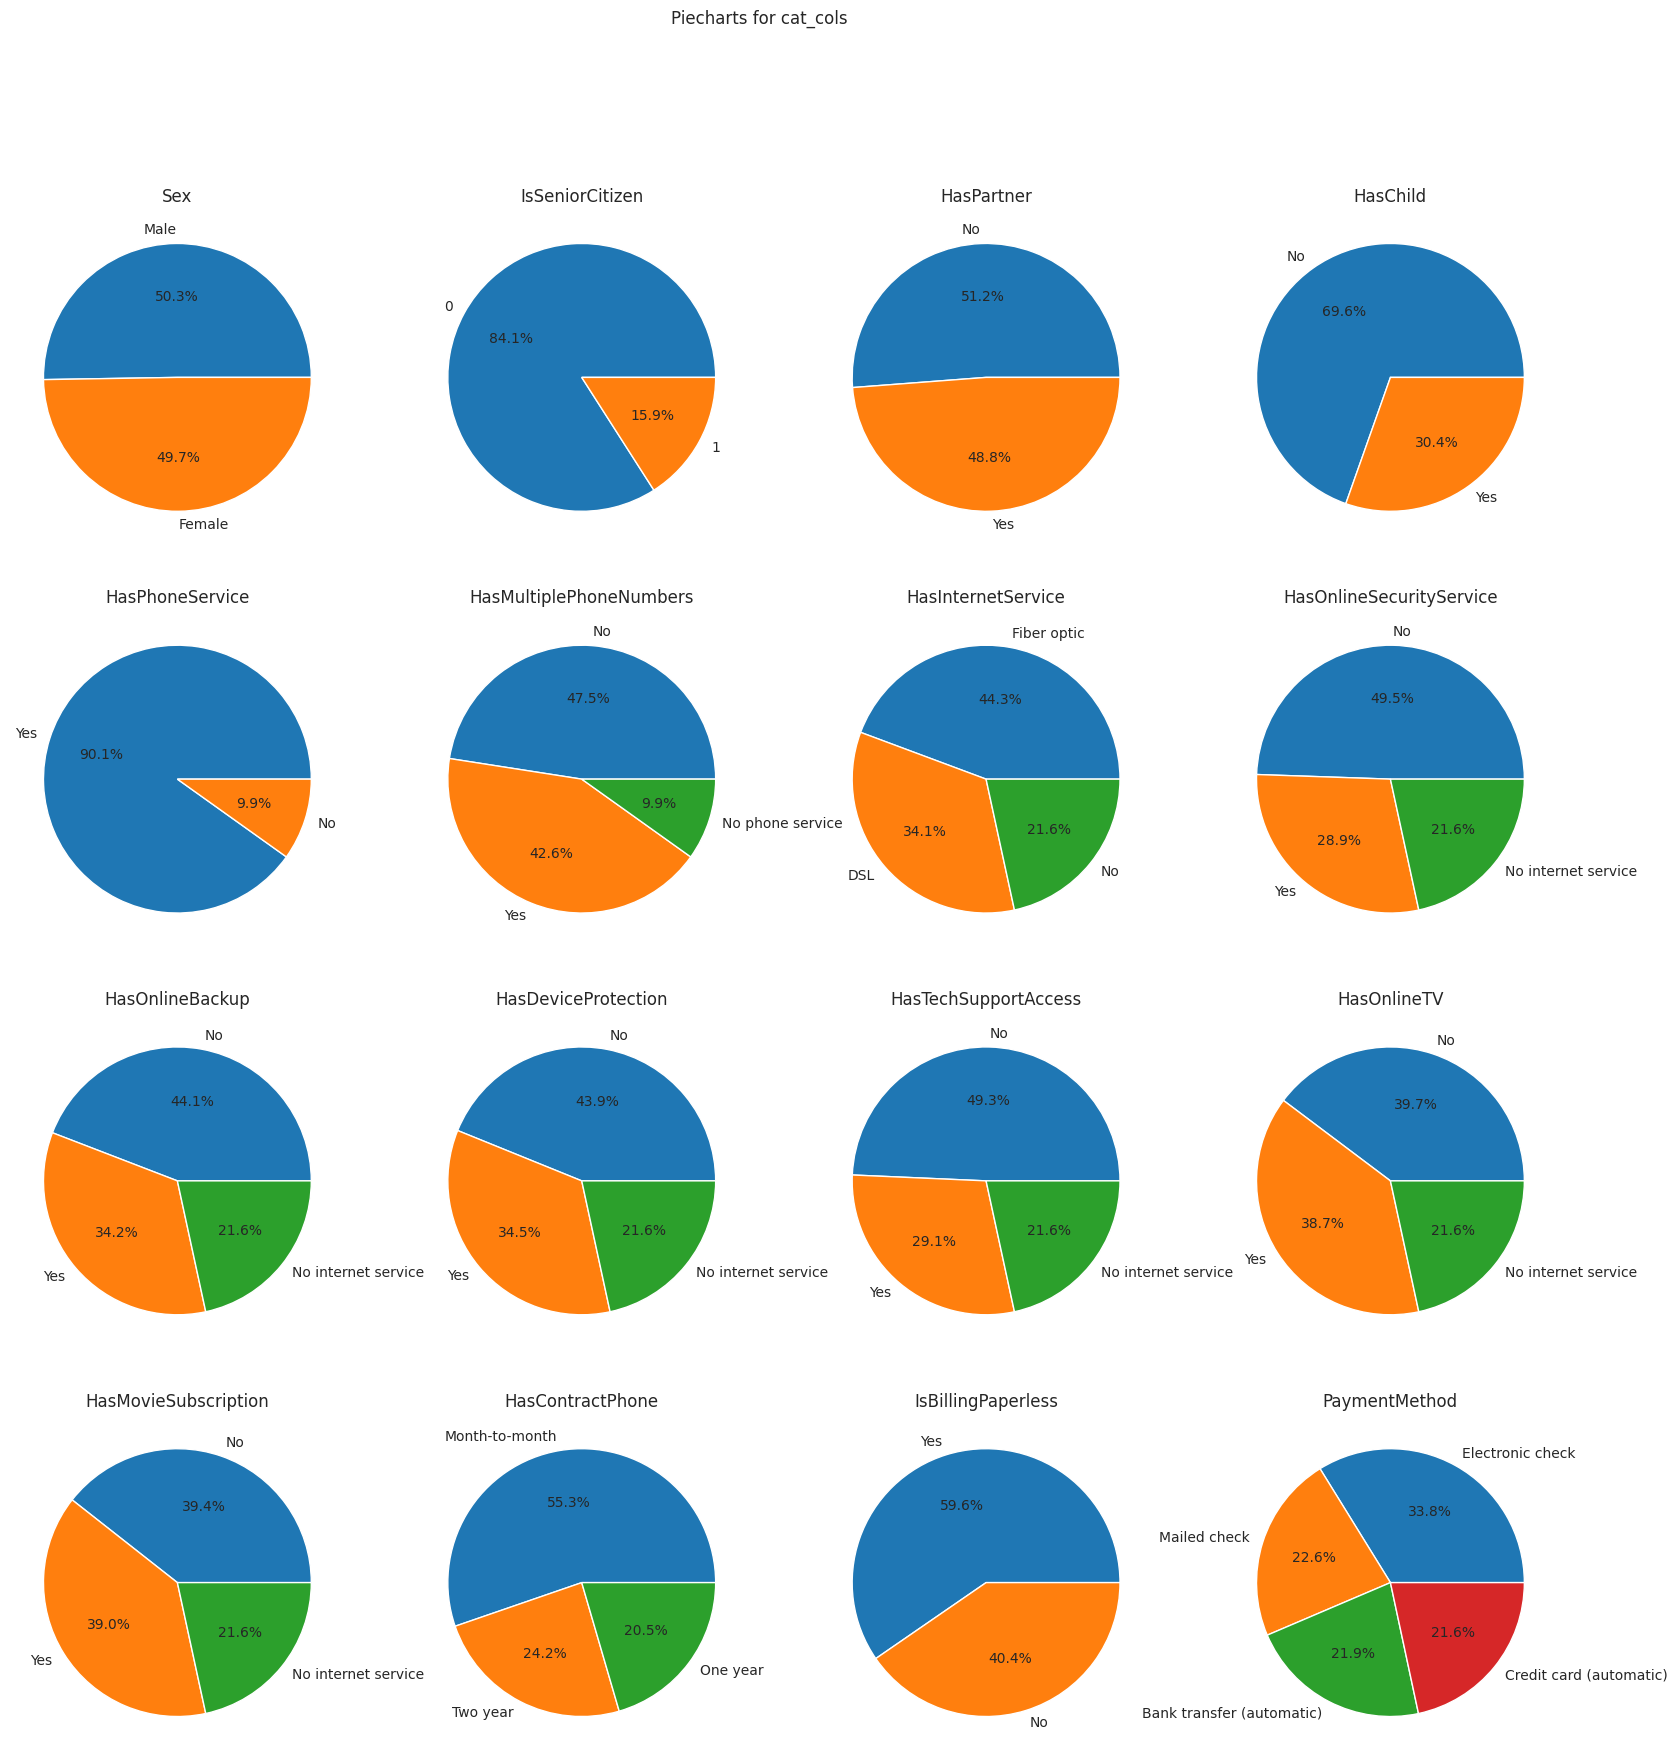

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax_array = axes.ravel()
fig.suptitle('Piecharts for cat_cols')
for i, feature in enumerate(cat_cols):
    x = data[feature].value_counts()
    n = x.index
    ax_array[i].pie(x=x, labels=n, autopct='%.1f%%')
    ax_array[i].set_title(feature)

*Let's look at the distribution of the target variable:*

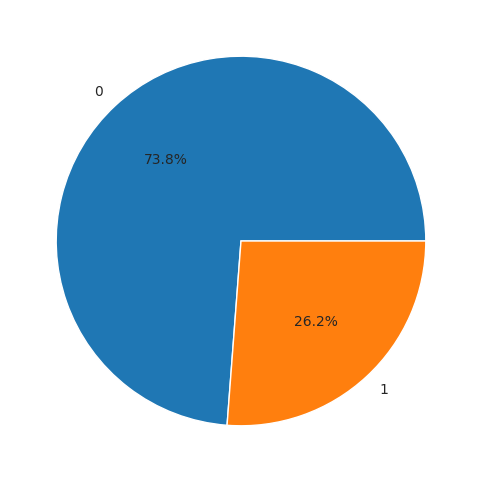

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(data[target_col].value_counts(), labels=[0, 1], autopct='%1.1f%%')
plt.show()

*It can be seen that the target variable is unbalanced, but not critically (the ratio is about 1 to 3). Therefore, we can ignore this in the analysis for now.*

**It is clear that there are quite a lot of outliers in TotalSpent, but for now we will not touch them (let's see if they affect the performance of the model)*

## Application of linear models
*First, let's preprocess the data, so that we can apply LogisticRegression. In other words, let's normalize numerical values and onehot-encode categorical ones.*

In [42]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

*Now let's process the categorical and quantitative features so that logistic regression can be applied.:*

In [43]:
preprocess = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat_ohe", OneHotEncoder(), cat_cols)
    ])
pipe = Pipeline([
        ("preprocess", preprocess),
        ("LogReg", LogisticRegression(random_state=42))
    ])

*Let's define the training data:*

In [44]:
y_train = data[target_col]
X_train = data.iloc[:, :-1]

*Now, let's train a model with standard parameters:*

In [45]:
params = [{'LogReg__C': [1]}]
logreg = GridSearchCV(pipe, params, scoring='roc_auc', refit=True, cv=5)
logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat_ohe',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('LogReg',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'LogReg__C': [1]}], scoring='roc_auc')

*The best quality and with what parameters we managed to get it:*

In [46]:
print(f'Parameters of the model:', logreg.best_params_)
print(f'ROC_AUC:', logreg.best_score_)

Parameters of the model: {'LogReg__C': 1}
ROC_AUC: 0.8448582002877965


## Gradient boosting

In [47]:
!pip install catboost

In [48]:
from catboost import CatBoostClassifier, cv

*Catboost allows us to upload categorical columns without pre-encoding, so we re-upload the dataset:*

In [49]:
# Loading the data
catboost_data = pd.read_csv('./train.csv')
# Filling in the missing values
catboost_data[catboost_data['TotalSpent'] == ' '] = catboost_data[catboost_data['TotalSpent'] == ' '].replace(' ', 0)
# Making sure the TotalSpent col is float
catboost_data['TotalSpent'] = catboost_data['TotalSpent'].astype(float)

*Now, let's divide our data into feature matrix and target vector:*

In [50]:
y_train_catboost = catboost_data[target_col]
X_train_catboost = catboost_data.iloc[:, :-1]

*And finetune the model to get the best quality:*

In [51]:
# Default params
params = {'iterations': [1000], 'learning_rate': [0.05], 'depth': [7], 'l2_leaf_reg': [6], 'early_stopping_rounds': [75], 'bagging_temperature': [0.61]}
# Model creation
catboost = CatBoostClassifier(silent=True, cat_features=cat_cols, eval_metric = 'AUC:hints=skip_train~false',)
# Gridsearch to find the best ones
best_params = catboost.grid_search(params, X_train_catboost, y_train_catboost, refit=True)

Stopped by overfitting detector  (75 iterations wait)

bestTest = 0.8722940311
bestIteration = 59

0:	loss: 0.8722940	best: 0.8722940 (0)	total: 1.78s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 0.8333666334
bestIteration = 134

Training on fold [1/3]

bestTest = 0.8458600726
bestIteration = 54

Training on fold [2/3]

bestTest = 0.8555655193
bestIteration = 28



*The best quality and with what parameters we managed to get*

In [52]:
print(f"Best parameters: {best_params['params']}")
print(f"Best AUC: {max(best_params['cv_results']['test-AUC-mean']):.4f}")

Best parameters: {'bagging_temperature': 0.61, 'depth': 7, 'od_wait': 75, 'learning_rate': 0.05, 'l2_leaf_reg': 6, 'iterations': 1000}
Best AUC: 0.8443


*We got the AUC_ROC over 0.84 with almost no effort, that proves the effectiveness of Catboost for Classification problems*